# Module 4 Final Project

* Student Name: Troy D. Dunkley
* Student Pace: Full Time
* Scheduled Project Review Date/Time: Monday 11.12.19
* Instructors' Names: Amber Yandow and Howard Smith

## CRISP-DM Methodology

Cross Industry Standard Proces for Data Mining, also known as the CRISP-DM Methodology, is being employed for this project. It is an open standard process model that describes common approaches used by data mining experts. CRISP-DM is currently the dominant process framework for data mining. It is comprised of the following phases:

* Business Understanding
* Data Understanding
* Data Preparation
* Modeling
* Evaluation
* Deployment

Below is a diagram of the methodology process flow:

<img src="CRISPDM_Process_Diagram.png" align="center">

## Project: Logistic Regression

<img src="Cust_Churn_LiveBucket.png">

### Business Understanding

The Business Understanding Phase focuses on understanding the project objectives and requirements from a business perspective, and then converting this knowledge into a data mining problem definition and a preliminary plan. The primary tasks within this phase include the following:

* Determine Business Objectives
* Assess Situation
* Determine Data Mining Goals
* Produce Project Plan

#### Determine Business Objective

*Background:*

Customer churn refers to when a customer ceases his or her relationship with a company. According to the authors of “Leading on the Edge of Chaos”, a 2% increase in customer retention (or decreasing churn) is equivalent to 10% reduction in costs. Additionally as per the White House Office of Consumer Affairs, it is 6–7 times more expensive to acquire a new customer than to retain an old one.

All businesses in the consumer market and enterprise sectors have to deal with churn as it could end up affecting the company revenue numbers and thereby influence policy decisions. Churn could happen due to many different reasons and churn analysis helps to identify the cause (and timing) of it thereby opening up opportunities to implement effective retention strategies.

The full cost of customer churn includes both lost revenue and the marketing costs involved with replacing those customers with new ones. Reducing customer churn is a key business goal of every online business.


*Business goals:* 

The ability to predict that a particular customer is at a high risk of churning, while there is still time to do something about it, represents a huge additional potential revenue source for every online business. Besides the direct loss of revenue that results from a customer abandoning the business, the costs of initially acquiring that customer may not have already been covered by the customer’s spending to date. (In other words, acquiring that customer may have actually been a losing investment.) Furthermore, it is always more difficult and expensive to acquire a new customer than it is to retain a current paying customer.


*Business success criteria:* 

To build and interpret a classification model that uses Logistic Regression to predict voluntary and involuntary customer churn.

#### Assess Situation
This task is not applicable for this project; however, assessments are typically comprised of the following:

* Prodiving an inventory of resources (Data Managers, Technical Support, etc.)
* Document requirements, assumptions and constraints
* Identify risks and contingencies
* Chronicle relevant terminology
* Preparation of Cost-Benefit Analysis


#### Determine Data Mining Goals
Logistic regression predicts the probability of an outcome that can only have two values (i.e. a dichotomy). The prediction is based on the use of one or several predictors (numerical and categorical). In this case, we will attempt to predict the probability of customer churn.

#### Produce Project Plan
This task is not applicable for this project, however we will leveraging various Python librairies to assist us with our analysis.

### Data Understanding

This phase starts with an initial data collection and proceeds with activities in order to get familiar with the data, to identify data quality problems, to discover first insights into the data, or to detect interesting subsets to form hypotheses for hidden information. Below are tasks associated with this phase:

* Collect Initial Data
* Describe Data
* Explore Data
* Verify Data Quality

#### Collect Initial Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import qgrid
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import plotly as py
import ipywidgets as widgets

from sklearn import preprocessing, datasets, linear_model, metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.feature_selection import RFE

from imblearn.over_sampling import SMOTE, ADASYN

from sklearn.linear_model import *
# from sklearn.linear_model import LogisticRegression

from pandas.plotting import scatter_matrix
from pivottablejs import pivot_ui


In [2]:
# Import csv file and view first 5 rows:

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

#### Describe Data

In this project, the Telco Customer Chrun dataset will be utilized; it is in the form of a .csv file. Below are descriptions of the columns within the dataset:

* **customerID** - Unique Customer Identifier
* **gender** - Customer gender
* **SeniorCitizen** -  Binary Flag
* **Dependents** -  Flsg to desginate dependents in the house
* **tenure** -  Number of years as a customer
* **PhoneService** -  Flag to determine if Phone Service in the house
* **MultipleLines** -  Flag to determine number of phone lines in the house
* **InternetService** -  Type of Internet Service
* **OnlineSecurity** -  Flag to determine if online security  in the house
* **OnlineBackup** - Flag to determine if online backup exists in the house
* **DeviceProtection** - Flag that determines if device protection exists in the house
* **TechSupport** - Flag to determine if tech support exists in the house
* **StreamingTV** - Flag to determine if Streaming TV exists in the house
* **StreamingMovies** - Flag to determine if Streaming Movies exist in the house
* **Contract** - Contract Type for customer
* **PaperlessBilling** - Flag to determine if customer signed up for Paperless Billing
* **PaymentMethod** - Payment Method for customer
* **MonthlyCharges** - Monthly Charges for customer
* **TotalCharges** - Total Charges for customer
* **Churn** - Flag to determine Customer Churn

#### Explore Data
The goal of this task is to examine the data within all datasets more closely. We will look at the range of values for each variable and their distributions. This should allow us to get familiar with data, spot signs of data quality problems and set the stage for data preperation.

In [3]:
# Return the first 5 rows for each dataset:

df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
# Generate descriptive statistics that summarize the central tendency,
# dispersion and shape of a dataset's distribution, excluding "NaN" values:

df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [5]:
print ("Table Information:")
print ("==================")
df.info()

Table Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float6

In [6]:
print ("Data Type Counts:"),
print ("=================="),
df.get_dtype_counts()

Data Type Counts:


float64     1
int64       2
object     18
dtype: int64

In [7]:
# Display the shape of the dataset:

df.shape

(7043, 21)

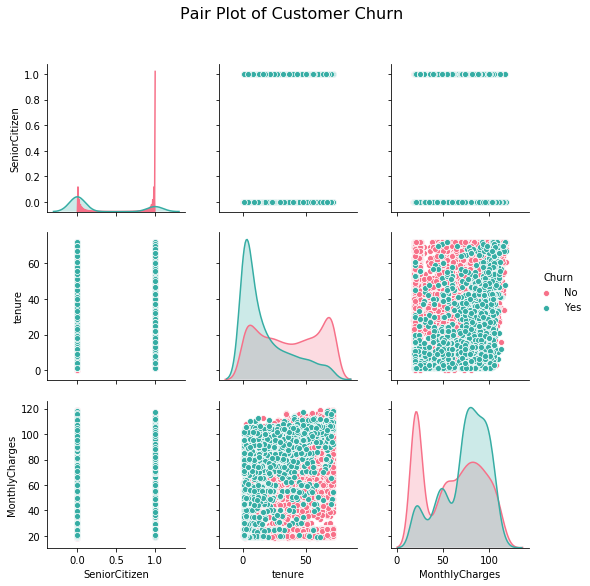

In [8]:
# Pair plots:

sns.pairplot(df, kind="scatter", hue="Churn",  palette="husl")
# plt.show()

plt.suptitle('Pair Plot of Customer Churn', 
             size = 16, y=1.08);

In [9]:
# Check the index values
df.index.values
# Check if a certain index exists
e in df.index.values

# If index does not exist
# df.set_index('column_name_to_use', inplace=True)

False

####  Verify Data Quality
During this portion of the analysis, I derived the following:

* Customer ID is the only unique field in the dataset
* No index exists on the dataset
* 7,042 rows exist with 21 columns
* Of the 21 columns, 18 are objects, 2 are integers and 1 is float
* The Total Charges column has been cast as an object instead of a float


### Data Preparation

The data preparation phase covers all activities to construct the final datasets from the initial raw data. These activities include the following:

* Select Data
* Clean Data
* Construct Data
* Integrate Data
* Format Data

Data preparation is 80% of the process. The two core activities in this phase are 
Data Wrangling and Data Analysis; they are the first logical programming steps. Data Wrangling is cyclical in nature and is language/framwork independent, so it will be necessary revisit the steps multiple times.

We will perform syntactical and meaningful checks on the data and identify any issues and recommend potential fixes.

#### Select Data

In [10]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

#### Clean Data
This task invoves the follwing steps:

* Check for missing data/impute values
* Check for duplicates
* Check for extraneous values
* Drop columns (if necessary)
* Drop rows (if necessary)

First, we will check for missing data by executing the code below:

In [11]:
# Convert any blank values to NaN:

df.replace(" ", np.nan, inplace=True)

# Find NaN value counts in dataset:

df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Our inquiries have confirmed that 11 null values exist in the Total Charges column, so now we will examine the rows where they exist:

In [12]:
# Find number of records where Total Charges equal NaN:

df[df['TotalCharges'].isnull()]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)          52.55           NaN    No  
753                Mailed check          20.25           NaN    No  
936                Mailed check          80.85           NaN    No  
1082               Mailed check          25.75           NaN    No  
1340    Credit card (automatic)          56.05           NaN    No  
3331               Mailed check          19.85           NaN    No  
3826               Mailed check          25.35           NaN    No  
4380               Mailed check          20.00           NaN    No  
5218               Mailed check          19.7

In [13]:
# Determine what percentage of rows in the TotalCharges column contain missing values
# Print out the number of unique values in this column

print('Percentage of Missing Total Charges Values:', round((len(df[df.TotalCharges.isna()])/ len(df)),4)*100,'%')
print('Number of Unique Total Charges Values Excluding Nulls:', df.TotalCharges.nunique())


Percentage of Missing Total Charges Values: 0.16 %
Number of Unique Total Charges Values Excluding Nulls: 6530


We will determine the uniqueness of each column and their associated values:

In [14]:
# Check uniqueness of columns in dataset:

for i in df:
    print('{} is unique: {}'.format(i, df[i].is_unique))

customerID is unique: True
gender is unique: False
SeniorCitizen is unique: False
Partner is unique: False
Dependents is unique: False
tenure is unique: False
PhoneService is unique: False
MultipleLines is unique: False
InternetService is unique: False
OnlineSecurity is unique: False
OnlineBackup is unique: False
DeviceProtection is unique: False
TechSupport is unique: False
StreamingTV is unique: False
StreamingMovies is unique: False
Contract is unique: False
PaperlessBilling is unique: False
PaymentMethod is unique: False
MonthlyCharges is unique: False
TotalCharges is unique: False
Churn is unique: False


In [15]:
# Check unique values of each column:

for i in df:
    print(i,(df[i].unique()))


customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [16]:
# Find min and max values for all columns:

data = df.fillna('')  # Fill NA/NaN values using the specified method.

for i in data:
    print(i,(min(data[i].unique())),(max(data[i].unique())))

customerID 0002-ORFBO 9995-HOTOH
gender Female Male
SeniorCitizen 0 1
Partner No Yes
Dependents No Yes
tenure 0 72
PhoneService No Yes
MultipleLines No Yes
InternetService DSL No
OnlineSecurity No Yes
OnlineBackup No Yes
DeviceProtection No Yes
TechSupport No Yes
StreamingTV No Yes
StreamingMovies No Yes
Contract Month-to-month Two year
PaperlessBilling No Yes
PaymentMethod Bank transfer (automatic) Mailed check
MonthlyCharges 18.25 118.75
TotalCharges  999.9
Churn No Yes


Based on the contents of the object columns, having duplicate values is valid.

Now we will check for extraneous values:

In [17]:
# Check for extraneous values:

for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

customerID 
 9818-XQCUV    0.000142
2320-TZRRH    0.000142
6368-NWMCE    0.000142
3842-QTGDL    0.000142
0396-HUJBP    0.000142
Name: customerID, dtype: float64 


gender 
 Male      0.504756
Female    0.495244
Name: gender, dtype: float64 


SeniorCitizen 
 0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64 


Partner 
 No     0.516967
Yes    0.483033
Name: Partner, dtype: float64 


Dependents 
 No     0.700412
Yes    0.299588
Name: Dependents, dtype: float64 


tenure 
 1     0.087037
72    0.051399
2     0.033792
3     0.028397
4     0.024989
Name: tenure, dtype: float64 


PhoneService 
 Yes    0.903166
No     0.096834
Name: PhoneService, dtype: float64 


MultipleLines 
 No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: MultipleLines, dtype: float64 


InternetService 
 Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: InternetService, dtype: float64 


OnlineSecurity 
 No                     0.49

We will address dropping rows and/or columns after we've finished formatting out data.

#### Constructing Data

There is no need to add new fields/rows any of the datasets.

#### Integrating Data

We did not have any disparate datasets to add.

#### Formatting Data

1.) Convert the TotalCharges column to float datatype

2.) Based on the earlier inquiries, we will modify “No internet service” to “No” for the following columns:

* OnlineSecurity
* OnlineBackup
* DeviceProtection
* TechSupport
* streamingTV
* streamingMovies

3.) We will modify “No phone service” to “No” for column “MultipleLines”

4.) We will replace the binary values of 0 and 1 for the SeniorCitizen column to "No and "Yes" respectively.

5.) Since the minimum tenure is 1 month and maximum tenure is 72 months, we will group them into the following groups: 

* 0–12 Months
* 12–24 Months
* 24–48 Months
* 48–60 Months
* Greater Than 60 Months

In [18]:
# 1.) Convert Total Charges to float data type:

df["TotalCharges"] = df["TotalCharges"].astype(float)

# 2.) Replace "No internet service" to "No" for the following columns:

r = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']

for i in r: 
    df[i]  = df[i].replace({'No internet service' : 'No'})

    
# 3.) Replace "No phone service" to "No" for the MultipleLines column:

df['MultipleLines'] = df['MultipleLines'].replace({'No phone service' : 'No'})

    
# 4.) Replace 0 and 1 values to "No and "Yes for the SeniorCitizen column:

df["SeniorCitizen"] = df["SeniorCitizen"].replace({1:"Yes",0:"No"})


# 5.) Tenure to categorical column:

def tenure_lab(df) :
    
    if df["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (df["tenure"] > 12) & (df["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (df["tenure"] > 24) & (df["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (df["tenure"] > 48) & (df["tenure"] <= 60) :
        return "Tenure_48-60"
    elif df["tenure"] > 60 :
        return "Tenure_60_Plus"
    
df["tenure_group"] = df.apply(lambda df:tenure_lab(df),
                                      axis = 1)
# 6.) Define datasets based on Churn values; will use for visualizations:

churn     = df[df["Churn"] == "Yes"]
not_churn = df[df["Churn"] == "No"]

In addition, we will drop the following:

* Drop rows where TotalCharges contain NaN values (0.16% of all rows)

In [19]:
# Drop TotalCharges rows containing NaN values:

df = df[df["TotalCharges"].notnull()]
df = df.reset_index()[df.columns]

def drop_cols(columns, df):
    return df.drop(columns, axis=1, inplace=True)


Set up variables for visualizations:

In [20]:
telco = df.iloc[:,1:]
telco_churn = telco[telco.Churn == "Yes"]
telco_not_churn = telco[telco.Churn == "No"]
telco_target = ["Churn"]
telco_categorical = telco.nunique()[telco.nunique().values <= 5].keys().tolist()
telco_categorical.remove("Churn")
telco_binary = telco.nunique()[telco.nunique().values <= 2].keys().tolist()
telco_binary.remove("Churn")
telco_numerical = telco.nunique()[telco.nunique().values >= 10].keys().tolist()

Create bar plot visualizations after formatting to view Churn/Non-Churn relationships between categorical variables:

In [21]:
# Create function to loop through categorical features:

def bar_plot(column):
    trace1 = go.Bar(
        x = telco[column].unique().tolist(),
        y = telco_churn[column].value_counts().tolist(),
        name = "Churn",
        marker= dict(color = 'rgba(255,12,75,0.75)')) #"rgba(255,12,75,0.75)"))
    trace2 = go.Bar(
        x = telco[column].unique().tolist(),
        y = telco_not_churn[column].value_counts().tolist(),
        name = "Not Churn",
        marker= dict(color = "rgba(0,12,75,0.75)"))
    data = [trace1,trace2]
    layout = go.Layout(barmode = "group", title = "Churn relationship with "+column,height = 300, width = 1000);
    fig = go.Figure(data = data,layout = layout);
#     plt.figure(figsize=(.1,.1))
    fig.show();
    
for each in telco_categorical:
    bar_plot(each);


Create box plot visualizations after formatting to view Churn/Non-Churn relationships between numerical variables:

In [22]:
# Create function to loop through numerical variables:

def box_plot(column):    
    trace1 = go.Box(y = telco_churn[column],
                         name = "Churn",
                         marker = dict(color = 'rgba(255,12,75,0.75)'))#'rgba(255,12,75,0.75)'))
    trace2 = go.Box(y = telco_not_churn[column],
                         name = "Not Churn",
                         marker = dict(color = "rgba(0,12,75,0.75)"))
    data = [trace1, trace2]
    layout = go.Layout(title = "Churn Situation for "+column,
                      xaxis = dict(title = column),height = 400, width = 900)
    fig = go.Figure(data = data,layout = layout)
    fig.show()
    
for each in telco_numerical:
    box_plot(each)

Next we will perform Label Encoding for the binary featues and Min-Max Scaling to the features with multiple values; this will standardize and normalize the dataset.

Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning. If the categorical feature has multiple values (more than two), Label Encoding will return different values for different classes.

The approach to Z-score normalization (or standardization) for featues with multiple values is Min-Max Scaling (often also simply called “normalization”).In this approach, the data is scaled to a fixed range - usually 0 to 1. The cost of having this bounded range - in contrast to standardization - is that we will end up with smaller standard deviations, which can suppress the effect of outliers.


In [23]:
# Use Label Encoding and Dummy Variables:

# Set up variable for customerID column:
Id_col     = ['customerID']

# Set up variable for target column:
target_col = ["Churn"]

# Set up list for categorical columns:
cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()  # ensures that number of values for each column does not exceed 6
cat_cols   = [x for x in cat_cols if x not in target_col]    # excludes the target column of "Churn"

# Set up list for numerical columns:
num_cols   = [x for x in df.columns if x not in cat_cols + target_col + Id_col]

# Set up list for binary columns:
bin_cols   = df.nunique()[df.nunique() == 2].keys().tolist()

# Set up list for columns with multiple values:
multi_cols = [i for i in cat_cols if i not in bin_cols]

# Encode labels with value between 0 and n_classes-1:
le = LabelEncoder()
for i in bin_cols :
    df[i] = le.fit_transform(df[i])  # Fits transformer to X and y with optional parameters fit_params 
                                     # and returns a transformed version of X.
    
# Convert categorical variable into dummy/indicator variables for columns with multiple values:
df = pd.get_dummies(data = df,columns = multi_cols )

# Transform features by scaling each feature to a given range.
# This MinMaxScaler estimator scales and translates each feature individually such
# that it is in the given range on the training set, e.g. between
# zero and one.

std = MinMaxScaler()
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

# Remove rows or columns by specifying label names and corresponding
# axis, or by specifying directly index or column names.
# dropping original values merging scaled values for numerical columns

df_orig = df.copy()  # make copy of original dataframe

df_orig['Churn_Yes'] = pd.get_dummies(df_orig['Churn'],drop_first=True)

df = df.drop(columns = num_cols,axis = 1) # drop numerical columns

# Merge DataFrame or named Series objects with a database-style join.
# The join is done on columns or indexes. If joining columns on
# columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
# on indexes or indexes on a column or columns, the index will be passed on

df = df.merge(scaled,left_index=True,right_index=True,how = "left")  # merge original dataframe with scaled version


In [24]:
# Confirm standardization/normalization:
df.info()
# df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 33 columns):
customerID                                 7032 non-null object
gender                                     7032 non-null int64
SeniorCitizen                              7032 non-null int64
Partner                                    7032 non-null int64
Dependents                                 7032 non-null int64
PhoneService                               7032 non-null int64
MultipleLines                              7032 non-null int64
OnlineSecurity                             7032 non-null int64
OnlineBackup                               7032 non-null int64
DeviceProtection                           7032 non-null int64
TechSupport                                7032 non-null int64
StreamingTV                                7032 non-null int64
StreamingMovies                            7032 non-null int64
PaperlessBilling                           7032 non-null int64
Churn     

customerID  gender  SeniorCitizen  Partner  Dependents  PhoneService  \
0  7590-VHVEG       0              0        1           0             0   
1  5575-GNVDE       1              0        0           0             1   
2  3668-QPYBK       1              0        0           0             1   
3  7795-CFOCW       1              0        0           0             0   
4  9237-HQITU       0              0        0           0             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   
1              0               1             0                 1  ...   
2              0               1             1                 0  ...   
3              0               1             0                 1  ...   
4              0               0             0                 0  ...   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  \
0                               1                           0   
1                               0                           1   
2                               0                           1   
3                               0                           0   
4                               1                           0   

   tenure_group_Tenure_0-12  tenure_group_Tenure_12-24  \
0                         1                          0   
1                         0                          0   
2                         1                          0   
3                         0                          0   
4                         1                          0   

   tenure_group_Tenure_24-48  tenure_group_Tenure_48-60  \
0                          0                          0   
1                          1                          0   
2                          0                          0   
3                          1                          0   
4                          0                          0   

   tenure_group_Tenure_60_Plus    tenure  MonthlyCharges  TotalCharges  
0                            0  0.000000        0.115423      0.001275  
1                            0  0.464789        0.385075      0.215867  
2                            0  0.014085        0.354229      0.010310  
3                            0  0.619718        0.239303      0.210241  
4                            0  0.014085        0.521891      0.015330  

[5 rows x 33 columns]

Create correlation heat map to view potential multicoliniarity:

In [25]:
# Display Correlation Heat Map:

#correlation
correlation = df.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "spectral", #Magma
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Heatmap for Customer Variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 100 ,l = 110,
                                       t = 80,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                        
                       ),yaxis_autorange='reversed'
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
fig.show()


### Modeling

According to the methodology, modeling techniques are now selected and applied at this point during the process.  Since some techniques have specific requirements regarding the structure of the data, so there can be a loop back to Data Preparation. The tasks are:

* Select Modeling Technique
* Generate Test Design
* Build Model
* Assess Model

#### Select Modeling Technique

The modeling technique that we will use is Logistic Regression.


#### Generate Test Design 

Create a training and test set of the dataset:

In [57]:
# Initial Model - scikit-learn
import statsmodels.api as sm

train,test = train_test_split(df,test_size = .30 ,random_state = 150)

cols    = [i for i in df.columns if i not in Id_col + target_col]
X_train = train[cols]
y_train = train[target_col]
X_test  = test[cols]
y_test  = test[target_col]


logreg = LogisticRegression(fit_intercept=False, C=1e16)
logreg.fit(X_train, y_train)

X = sm.tools.add_constant(X)
logit_model = sm.Logit(y, X)
result = logit_model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.411986
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7004
Method:                           MLE   Df Model:                           27
Date:                Tue, 12 Nov 2019   Pseudo R-squ.:                  0.2885
Time:                        16:45:14   Log-Likelihood:                -2897.1
converged:                       True   LL-Null:                       -4071.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.0565        nan        nan        nan         nan         nan
Contract_Month-to-month                     0.7387        nan        nan        nan         nan         nan
Contract_One year                           0.0461        nan        nan        nan         nan         nan
Contract_Two year                          -0.7283        nan        nan        nan         nan         nan
Dependents                                 -0.1383      0.090     -1.536      0.125      -0.315       0.038
DeviceProtection                            0.1634      0.177      0.924      0.355      -0.183       0.510
InternetService_DSL                         0.0063        nan        nan        nan         nan         nan
InternetService_Fiber optic                 1.7040        nan        nan        nan         nan         nan
InternetService_No                         -1.6538        nan        nan        nan         nan         nan
MonthlyCharges                             -3.5271      3.202     -1.101      0.271      -9.804       2.750
MultipleLines                               0.4728      0.178      2.655      0.008       0.124       0.822
OnlineBackup                                0.0181      0.176      0.103      0.918      -0.327       0.363
OnlineSecurity                             -0.1908      0.179     -1.065      0.287      -0.542       0.160
PaperlessBilling                            0.3496      0.075      4.663      0.000       0.203       0.497
Partner                                     0.0076      0.078      0.097      0.922      -0.146       0.161
PaymentMethod_Bank transfer (automatic)    -0.0171        nan        nan        nan         nan         nan
PaymentMethod_Credit card (automatic)      -0.1020        nan        nan        nan         nan         nan
PaymentMethod_Electronic check              0.2695        nan        nan        nan         nan         nan
PaymentMethod_Mailed check                 -0.0939        nan        nan        nan         nan         nan
PhoneService                                0.1122      0.651      0.172      0.863      -1.163       1.388
SeniorCitizen                               0.2219      0.085      2.616      0.009       0.056       0.388
StreamingMovies                             0.5914      0.328      1.805      0.071      -0.051       1.234
StreamingTV                                 0.5909      0.327      1.805      0.071      -0.051       1.233
TechSupport                                -0.1719      0.181     -0.949      0.343      -0.527       0.183
TotalCharges                                1.5440      0.645      2.393      0.017       0.279       2.809
gender                                     -0.0207      0.065     -0.317      0.751      -0.148       0.107
tenure                                     -4.6663      0.671     -6.958      0.000      -5.981      -3.352
t

AUC: 0.8302820864245692


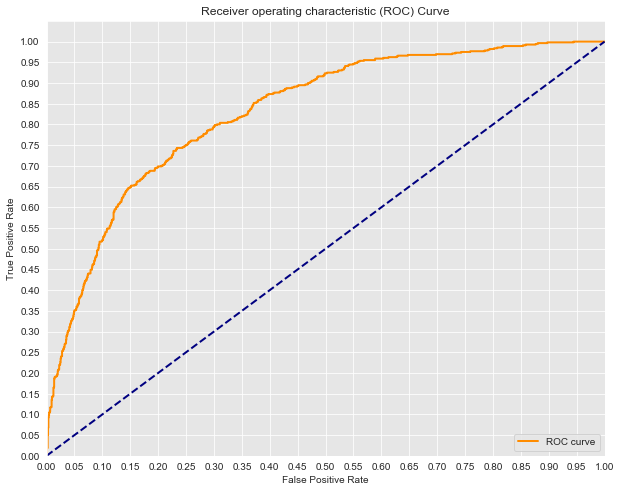

In [27]:
# Create an ROC Curve for the scikit-learn model:

y_score = logreg.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)


sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Test AUC: 0.8302820864245692
Train AUC: 0.8567645530717276


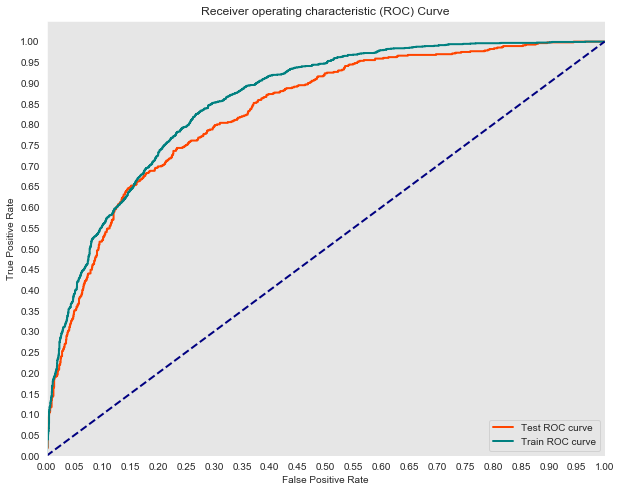

In [28]:
# As before add an ROC curve to the graph for the train set as well:

y_test_score = logreg.decision_function(X_test)
y_train_score = logreg.decision_function(X_train)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)

print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))

sns.set_style("dark", {"axes.facecolor": ".9"})

plt.figure(figsize=(10,8))
lw = 2
plt.plot(test_fpr, test_tpr, color='orangered',
         lw=lw, label='Test ROC curve')
plt.plot(train_fpr, train_tpr, color='teal',
         lw=lw, label='Train ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [29]:
# Calculate the precision, recall, accuracy, and F1-score of classifier:

y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

print('Training Precision: ', precision_score(y_hat_train, y_train))
print('Testing Precision: ', precision_score(y_hat_test, y_test))
print('\n')

print('Training Recall: ', recall_score(y_hat_train, y_train))
print('Testing Recall: ', recall_score(y_hat_test, y_test))
print('\n')

print('Training Accuracy: ', accuracy_score(y_hat_train, y_train))
print('Testing Accuracy: ', accuracy_score(y_hat_test, y_test))
print('\n')

print('Training F1-Score: ',f1_score(y_hat_train,y_train))
print('Testing F1-Score: ',f1_score(y_hat_test,y_test))

Training Precision:  0.5474006116207951
Testing Precision:  0.5472370766488414


Training Recall:  0.6741996233521658
Testing Recall:  0.6449579831932774


Training Accuracy:  0.8094270621698496
Testing Accuracy:  0.7995260663507109


Training F1-Score:  0.6042194092827005
Testing F1-Score:  0.592092574734812


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
AUC for 0.001: 0.8097743469710204


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
AUC for 0.01: 0.8283637652490422


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='libli

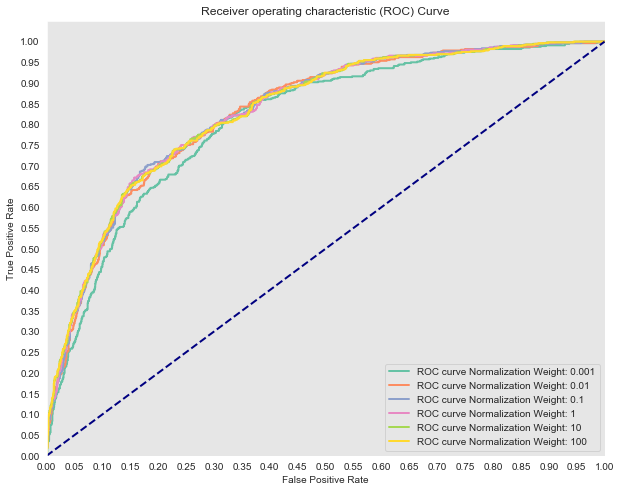

In [30]:
# Now let's compare a few different regularization performances on the dataset:

C_param_range = [0.001,0.01,0.1,1,10,100]
names = [0.001,0.01,0.1,1,10,100]
colors = sns.color_palette("Set2")

plt.figure(figsize=(10,8))

sns.set_style("dark", {"axes.facecolor": ".9"})
for n, c in enumerate(C_param_range):
    #Fit a model
    logreg = LogisticRegression(fit_intercept = False, C = c,solver='liblinear') #Starter code
    model_log = logreg.fit(X_train, y_train)
    print(model_log) #Preview model params

    #Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.fit(X_train, y_train).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('\n')
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve Normalization Weight: {}'.format(names[n]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [31]:
# Create a general function that plots the confusion matrix:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #Add Normalization Option
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    

Confusion matrix, without normalization
[[1381  256]
 [ 168  305]]


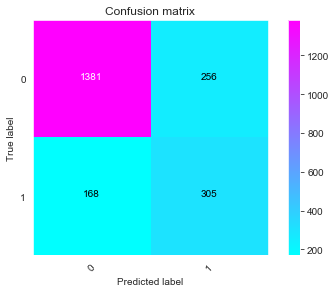

In [32]:
# Plot confusion matrix without normalization:

cnf_matrix = confusion_matrix(y_hat_test, y_test)
plot_confusion_matrix(cnf_matrix, classes=[0,1], cmap = "cool")

Normalized confusion matrix
[[0.84361637 0.15638363]
 [0.3551797  0.6448203 ]]


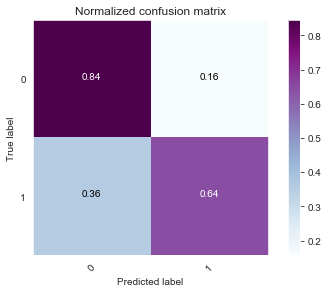

In [33]:
# Plot normalized confusion matrix:

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1], normalize=True,
                      title='Normalized confusion matrix',cmap = "BuPu") # cool/YlOrRd

plt.show()

In [34]:
# Split the data into train and test sets:

X = df[df.columns.difference(['customerID','Churn'])]
y = df.Churn
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [35]:
# Calculate and then plot the precision, recall, accuracy, and F1-score for the test and train splits 
# using different training set sizes:

training_Precision = []
testing_Precision = []
training_Recall = []
testing_Recall = []
training_Accuracy = []
testing_Accuracy = []
training_F1 = []
testing_F1 = []

for i in range(10,95):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100.0)
    logreg = LogisticRegression(fit_intercept = False, C = 1e12,solver='liblinear')
    model_log = logreg.fit(X_train, y_train)
    y_hat_test = logreg.predict(X_test)
    y_hat_train = logreg.predict(X_train)

    training_Precision.append(precision_score(y_hat_train, y_train))
    testing_Precision.append(precision_score(y_hat_test, y_test))
    training_Recall.append(recall_score(y_hat_train, y_train))
    testing_Recall.append(recall_score(y_hat_test, y_test))
    training_Accuracy.append(accuracy_score(y_hat_train, y_train))
    testing_Accuracy.append(accuracy_score(y_hat_test, y_test))
    training_F1.append(f1_score(y_hat_train,y_train))
    testing_F1.append(f1_score(y_hat_test,y_test))


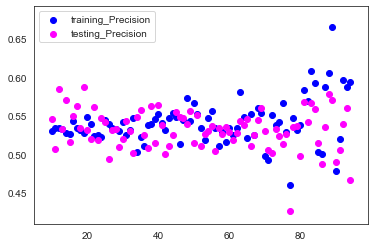

In [36]:
# Create scatter plot looking at the test and train precision:

sns.set_style("white", {"axes.facecolor": "1"})
plt.scatter(list(range(10,95)), training_Precision, label = 'training_Precision',c="blue")
plt.scatter(list(range(10,95)), testing_Precision, label = 'testing_Precision', c="magenta")
plt.legend();

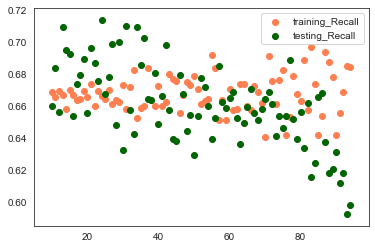

In [37]:
# Create scatter plot looking at the test and train recall:

sns.set_style("white", {"axes.facecolor": "1"})
plt.scatter(list(range(10,95)), training_Recall, label = 'training_Recall',c="coral")
plt.scatter(list(range(10,95)), testing_Recall, label = 'testing_Recall',c="darkgreen")
plt.legend();

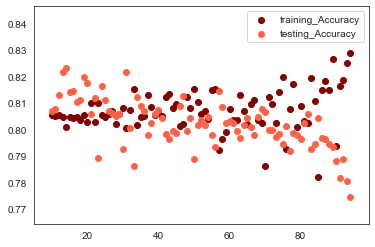

In [38]:
# Create scatter plot looking at the test and train accuracy:

sns.set_style("white", {"axes.facecolor": "1"})
plt.scatter(list(range(10,95)), training_Accuracy, label = 'training_Accuracy',c="maroon")
plt.scatter(list(range(10,95)), testing_Accuracy, label = 'testing_Accuracy', c="tomato")
plt.legend();

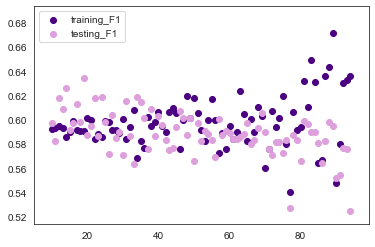

In [39]:
# Create scatter plot looking at the test and train f1-score:

sns.set_style("white", {"axes.facecolor": "1"})
plt.scatter(list(range(10,95)), training_F1, label = 'training_F1', c="indigo")
plt.scatter(list(range(10,95)), testing_F1, label = 'testing_F1', c="plum")
plt.legend();

In [40]:
# Use the SMOTE class from the imblearn package in order to improve the model's 
# performance on the minority class:

print ('Original class distribution')
print(y_train.value_counts()) #Previous original class distribution
print ('\n')
print ('Sample class distribution')
X_train_resampled, y_train_resampled = SMOTE().fit_sample(X_train, y_train) 
print(pd.Series(y_train_resampled).value_counts()) #Preview synthetic sample class distribution

Original class distribution
0    315
1    106
Name: Churn, dtype: int64


Sample class distribution
1    315
0    315
dtype: int64


LogisticRegression(C=0.005, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
AUC for 0.005: 0.8346002070428257


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
AUC for 0.1: 0.8292079207920792


LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='libline

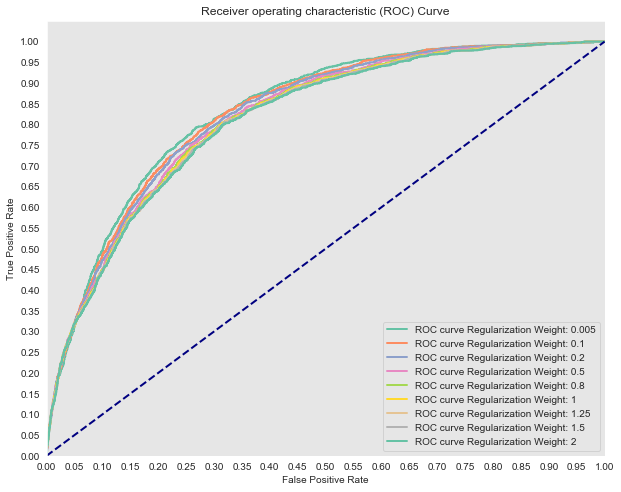

In [41]:
# Now let's compare a few different regularization performances on the dataset:

C_param_range = [0.005, 0.1, 0.2, 0.5, 0.8, 1, 1.25, 1.5, 2]
names = [0.005, 0.1, 0.2, 0.5, 0.8, 1, 1.25, 1.5, 2]
colors = sns.color_palette("Set2", n_colors=len(names))

plt.figure(figsize=(10,8))

sns.set_style("dark", {"axes.facecolor": ".9"})
for n, c in enumerate(C_param_range):
    #Fit a model
    logreg = LogisticRegression(fit_intercept = False, C = c, solver='liblinear') #Starter code
    model_log = logreg.fit(X_train_resampled, y_train_resampled)
    print(model_log) #Preview model params

    #Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.fit(X_train_resampled, y_train_resampled).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('\n')
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve Regularization Weight: {}'.format(names[n]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Confusion matrix, without normalization
[[3805  596]
 [1043 1167]]


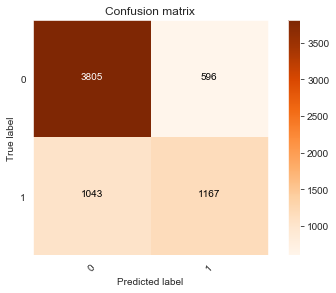

In [42]:
cnf_matrix = confusion_matrix(y_hat_test, y_test)
plot_confusion_matrix(cnf_matrix, classes=[0,1], cmap = "Oranges")

Original class distribution
0    5163
1    1869
Name: Churn, dtype: int64


Sample class distribution
1    5163
0    5163
dtype: int64


LogisticRegression(C=0.005, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
AUC for 0.005: 0.8600005400588665


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
AUC for 0.1: 0.8626198255609862


LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=No

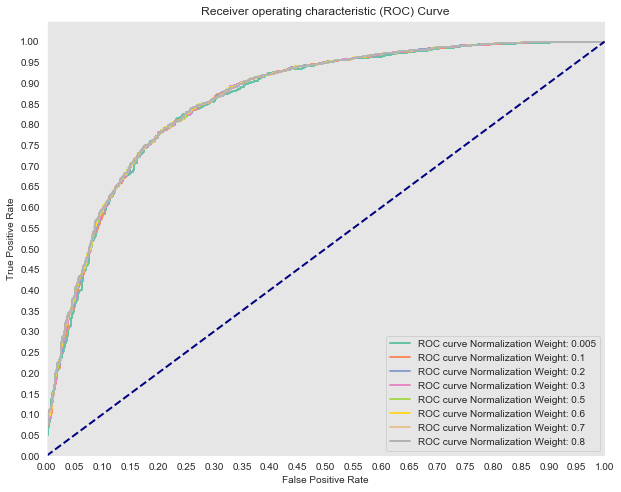

In [43]:
# Review AUC score and ROC curves :

print ('Original class distribution')
print(y.value_counts()) #Previous original class distribution
X_resampled, y_resampled = SMOTE().fit_sample(X, y) 
print('\n')
print ('Sample class distribution')
print(pd.Series(y_resampled).value_counts()) #Preview synthetic sample class distribution
print('\n')

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=0)

# Now let's compare a few different regularization performances on the dataset:

C_param_range = [0.005, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8]
names = [0.005, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9]
colors = sns.color_palette("Set2", n_colors=len(names))

plt.figure(figsize=(10,8))

sns.set_style("dark", {"axes.facecolor": ".9"})
for n, c in enumerate(C_param_range):
    #Fit a model
    logreg = LogisticRegression(fit_intercept = False, C = c, solver='liblinear') #Starter code
    model_log = logreg.fit(X_train, y_train)
    print(model_log) #Preview model params

    #Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.fit(X_train, y_train).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('\n')
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve Normalization Weight: {}'.format(names[n]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

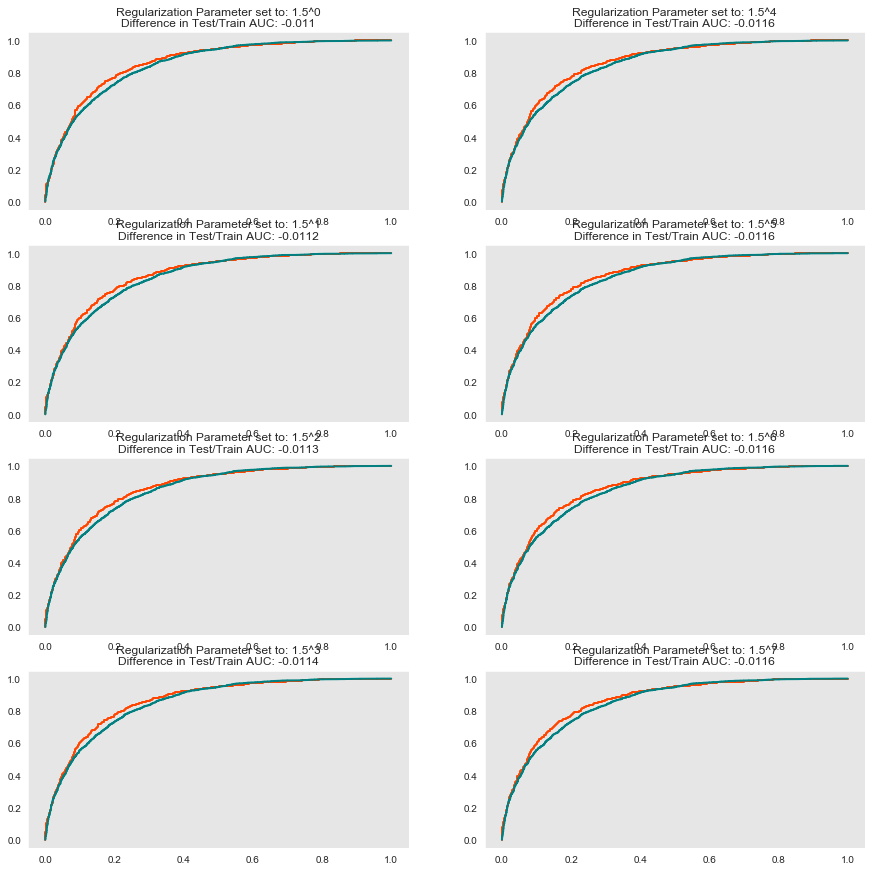

In [44]:
# Altering the Regularization Parameter

# Create different subplots with varying regularization (C) parameters
# For each, plot the ROC curve of the train and test set for that specific model
# Regularization parameters between 1 and 20 are recommended

sns.set_style("dark", {"axes.facecolor": ".9"})
fig, axes = plt.subplots(4,2, figsize=(15,15))
for n in range(8):
    i = n%4
    j = n//4
    ax = axes[i,j]
    #Fit a model
    logreg = LogisticRegression(fit_intercept=True, C=1.5**(n))
    logreg.fit(X_train, y_train)
    #Print Stats
    y_test_score = logreg.decision_function(X_test)
    y_train_score = logreg.decision_function(X_train)

    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
    
    test_auc = auc(test_fpr, test_tpr)
    train_auc = auc(train_fpr, train_tpr)
    auc_diff = round(train_auc - test_auc, 4)

#     print('Test AUC with C=1.5^{}: {}'.format(n*2, auc(test_fpr, test_tpr)))
#     print('Train AUCwith C=1.5^{}: {}'.format(n*2, auc(train_fpr, train_tpr)))
    # Add the plot
    ax.plot(test_fpr, test_tpr, color='orangered',
         lw=lw, label='Test ROC curve')
    ax.plot(train_fpr, train_tpr, color='teal',
             lw=lw, label='train ROC curve')
    
    ax.set_title('Regularization Parameter set to: 1.5^{}\nDifference in Test/Train AUC: {}'.format(n, auc_diff))



#### Assess Model
With feature selection, our goal is to find a model that is able to maintain high accuracy while not overfitting to noise.

In [45]:
# from itertools import combinations
# combinations = list(combinations(boston.feature_names, 2))

# interactions = []
# data = X_scaled.copy()
# for comb in combinations:
#     data["interaction"] = data[comb[0]] * data[comb[1]]
#     score = np.mean(cross_val_score(regression, data, y, scoring="r2", cv=crossvalidation))
#     if score > baseline: interactions.append((comb[0], comb[1], round(score,3)))
            
# print("Top 7 interactions: %s" %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:7])

In [46]:
# df1 = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
# df1.head()
# df.head()

# # obtaining the X and Y variables from the dataframe
features = df_orig[df_orig.columns.difference(['customerID'])]
target = df_orig['Churn']
# # creating dummy variable for Churn
# features['Churn_Yes'] = pd.get_dummies(features['Churn'],drop_first=True)
features.drop(columns=['Churn'], inplace=True)
features.head()
# features.info()

# features[['Churn','Churn_Yes']]

Churn_Yes  Contract_Month-to-month  Contract_One year  Contract_Two year  \
0          0                        1                  0                  0   
1          0                        0                  1                  0   
2          1                        1                  0                  0   
3          0                        0                  1                  0   
4          1                        1                  0                  0   

   Dependents  DeviceProtection  InternetService_DSL  \
0           0                 0                    1   
1           0                 1                    1   
2           0                 0                    1   
3           0                 1                    1   
4           0                 0                    0   

   InternetService_Fiber optic  InternetService_No  MonthlyCharges  ...  \
0                            0                   0           29.85  ...   
1                            0                   0           56.95  ...   
2                            0                   0           53.85  ...   
3                            0                   0           42.30  ...   
4                            1                   0           70.70  ...   

   StreamingTV  TechSupport  TotalCharges  gender  tenure  \
0            0            0         29.85       0       1   
1            0            0       1889.50       1      34   
2            0            0        108.15       1       2   
3            0            1       1840.75       1      45   
4            0            0        151.65       0       2   

   tenure_group_Tenure_0-12  tenure_group_Tenure_12-24  \
0                         1                          0   
1                         0                          0   
2                         1                          0   
3                         0                          0   
4                         1                          0   

   tenure_group_Tenure_24-48  tenure_group_Tenure_48-60  \
0                          0                          0   
1                          1                          0   
2                          0                          0   
3                          1                          0   
4                          0                          0   

   tenure_group_Tenure_60_Plus  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0  

[5 rows x 32 columns]

In [47]:
# X_train.iloc[:,:-1]
# X_train[X_train.columns != 'Churn_Yes']
# X_train[X_train.columns.difference (['Churn_Yes'])]
# df[df.columns.difference(['b'])]

In [48]:
# from sklearn import preprocessing
# X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=20,test_size=0.2)
# scaler = preprocessing.StandardScaler()

# ## scaling every feature except the binary column female
# scaler.fit(X_train.iloc[:,:-1])
# transformed_training_features = scaler.transform(X_train.iloc[:,:-1])
# transformed_testing_features = scaler.transform(X_test.iloc[:,:-1])

# X_train_transformed = pd.DataFrame(scaler.transform(X_train.iloc[:,:-1]), columns=X_train.columns[:-1], index=X_train.index)
# X_train_transformed['female'] = X_train['female']

# X_test_transformed = pd.DataFrame(scaler.transform(X_test.iloc[:,:-1]), columns=X_train.columns[:-1], index=X_test.index)
# X_test_transformed['female'] = X_test['female']

In [49]:
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=20,test_size=0.2)
scaler = preprocessing.StandardScaler()

X_train_c = X_train[X_train.columns.difference (['Churn_Yes'])]
X_test_c = X_test[X_test.columns.difference (['Churn_Yes'])]

# scaling every feature except the binary column female
scaler.fit(X_train_c)
transformed_training_features = scaler.transform(X_train[X_train.columns.difference (['Churn_Yes'])])
transformed_testing_features = scaler.transform(X_test[X_test.columns.difference (['Churn_Yes'])])

X_train_transformed = pd.DataFrame(scaler.transform(X_train[X_train.columns.difference (['Churn_Yes'])]), columns=X_train_c.columns, index=X_train.index)
X_train_transformed['Churn_Yes'] = X_train['Churn_Yes']

X_test_transformed = pd.DataFrame(scaler.transform(X_test[X_test.columns.difference (['Churn_Yes'])]), columns=X_train_c.columns, index=X_test.index)
X_test_transformed['Churn_Yes'] = X_test['Churn_Yes']


In [50]:
def run_model(model,X_train,X_test,y_train,y_test):
    
    print('Training R^2 :',model.score(X_train,y_train))
    y_pred_train = model.predict(X_train)
    print('Training Root Mean Square Error',np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))
    print('\n----------------\n')
    print('Testing R^2 :',model.score(X_test,y_test))
    y_pred_test = model.predict(X_test)
    print('Testing Root Mean Square Error',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

In [51]:
lm = LinearRegression()
lm.fit(X_train_transformed,y_train)
run_model(lm,X_train_transformed,X_test_transformed,y_train,y_test)

Training R^2 : 1.0
Training Root Mean Square Error 1.813652697930179e-15

----------------

Testing R^2 : 1.0
Testing Root Mean Square Error 1.7855351136510075e-15


#### Additional Questions